In [14]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate

In [15]:
#Make cosine function
f = lambda x: np.cos(x)
#Set x boundaries
x_min = -np.pi/2
x_max = np.pi/2
x = np.linspace(x_min, x_max, 11)

In [55]:
#Polynomial fitting
dx = np.median(np.diff(x))
#Skipping the first and last regions
xx = np.linspace(x[1], x[-2]-1e-13, 101)
yy_true = f(xx)
yy = np.zeros(len(yy_true))
y = f(x)

def poly(deg):
    for i, mx in enumerate(xx):
        j = np.int((mx - x_min)/dx)
        pp = np.polyfit(x[j-1:j+3], y[j-1: j+3], deg)
        yy[i] = np.polyval(pp, mx)
        
    return yy

def plot_poly(ax1, xx, yy, yy_true):
    ax1.plot(xx, yy_true, '.', markersize = '5', color = 'red')
    ax1.plot(xx, yy, '-', markersize = '2', color = 'black')
    ax1.set_title("2nd Order Polynomial Fit")
    ax2.set_ylabel("y = cos(x)")
    
def poly_err(deg):
    #Returns the mean error for any order of polynomial fit
    return repr(np.mean(np.abs(poly(deg) - yy_true)))
    
yy = poly(2)

In [56]:
#Cubic spline fitting
xx_spl = np.linspace(x[0], x[-1], 101)

spln = interpolate.splrep(x, y)
yy_spl = interpolate.splev(xx, spln)

def plot_spline(ax2):
    ax2.plot(xx_spl, yy_spl, '-', markersize = '2', color = 'black')
    ax2.plot(xx_spl, yy_true, '.', markersize = '5', color = 'red')
    ax2.set_title("Cubic Spline Fit")

In [57]:
#Rational function interpolation


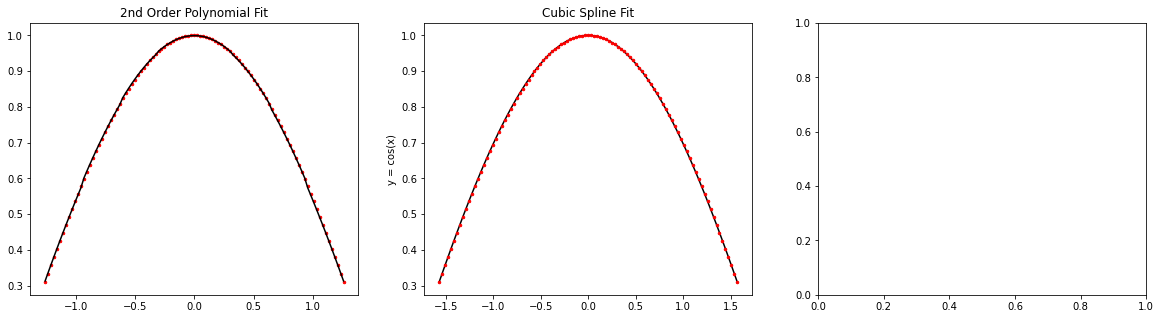

The mean error for the 2nd order polynomial fit is:  0.0013958173092645848
The mean error for the 3rd order polynomial fit is:  0.00011088114090711158
The mean error for the cubic spline fit is:  1.3486240222884336e-05


In [58]:
#Plot cos(x) fits and output mean errors
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(20,5))
plot_poly(ax1, xx, yy, yy_true)
plot_spline(ax2)
plt.show()

def err_print():
    #Print the associated error
    print('The mean error for the 2nd order polynomial fit is: ', poly_err(2) )
    print('The mean error for the 3rd order polynomial fit is: ', poly_err(3) )
    print('The mean error for the cubic spline fit is: ', repr(np.mean(np.abs(yy_spl - yy_true))) )

err_print()

In [9]:
#Define Lorentzian function
f = lambda x: 1/(1+x**2)
#Set x boundaries
x_min = -1
x_max = 1
x = np.linspace(x_min, x_max, 11)